# Cherry picking dice throws

Implement the `roll_dice_n_times` function and make sure that you get a `correlation coefficient` that is close to zero.

In [102]:
import pandas as pd
from random import randint

def roll_dice_n_times(n):
    data = [randint(1,7) for x in range(0,n)]
    return data

total_number_of_rolls = 200

dice_throws = pd.DataFrame({
   "scores on red": roll_dice_n_times(total_number_of_rolls),
   "scores on green": roll_dice_n_times(total_number_of_rolls)
})

# confirm that you get a correlation coefficient close to zero
dice_throws.corr()

,scores on red,scores on green
scores on red,1.000000,0.070355
scores on green,0.070355,1.000000


Using the data you have, find the "most correlated" 10 consecutive throws. That is: compare the rolls with index 0..9, then with index 1..10. Each time you do this, keep track of the subarrays that have the most correlation. (`Correlation coefficient` furthest from zero).

Experiment with `total_number_of_rolls`

Is it easier to find highly correlated data when there is more data to choose from? Is it harder to find 20 highly correlated consecutive rolls? How would you collect data to support your assertion?

The most corralated 10 consecutive rolls had a corelation coefficient of:  0.8750546926274871


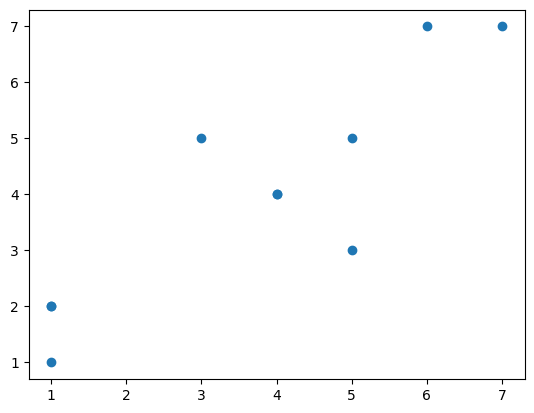

In [103]:
import matplotlib.pyplot as plt

highest_corr_value = 0
i_value = None

for i in range(0,total_number_of_rolls-1):
    if i > total_number_of_rolls - 11:
        pass
    else:
        corr_value = abs(dice_throws[i:i+10]['scores on red'].corr(dice_throws[i:i+10]['scores on green']))
        if  corr_value > highest_corr_value:
            highest_corr_value = corr_value
            i_value = i

print('The most corralated 10 consecutive rolls had a corelation coefficient of: ', highest_corr_value)
plt.scatter(dice_throws[i_value:i_value+10]['scores on red'], dice_throws[i_value:i_value+10]['scores on green'])

The larger the sample of rolls the easier it is to find consecutive rolls with high correlation coefficients. To collect this data I would record this highest correlation coefficient data and find a mean for different numbers of rolls. I would plot this.